In [1]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [2]:
import string
import re

In [3]:
%matplotlib inline

In [4]:
df_train = pd.read_csv('E:/dataset/sentiment analysis/train_2kmZucJ.csv')

In [5]:
df_train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [6]:
df_test = pd.read_csv('E:/dataset/sentiment analysis/test_oJQbWVk.csv')

In [7]:
df_test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953 entries, 0 to 1952
Data columns (total 2 columns):
id       1953 non-null int64
tweet    1953 non-null object
dtypes: int64(1), object(1)
memory usage: 30.6+ KB


In [8]:
df_train['label']

0       0
1       0
2       0
3       0
4       1
5       1
6       0
7       0
8       0
9       0
10      1
11      1
12      1
13      0
14      1
15      0
16      0
17      0
18      1
19      1
20      0
21      0
22      1
23      1
24      0
25      0
26      1
27      1
28      0
29      0
       ..
7890    1
7891    0
7892    0
7893    0
7894    0
7895    1
7896    1
7897    1
7898    0
7899    0
7900    0
7901    1
7902    1
7903    0
7904    1
7905    0
7906    0
7907    0
7908    1
7909    0
7910    0
7911    0
7912    0
7913    1
7914    0
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
id       7920 non-null int64
label    7920 non-null int64
tweet    7920 non-null object
dtypes: int64(2), object(1)
memory usage: 185.7+ KB


In [14]:
df_train[df_train['label']==1].head()

,id,label,tweet
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
10,11,1,hey #apple when you make a new ipod dont make ...
11,12,1,Ha! Not heavy machinery but it does what I nee...
12,13,1,Contemplating giving in to the iPhone bandwago...


In [16]:
df_train['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

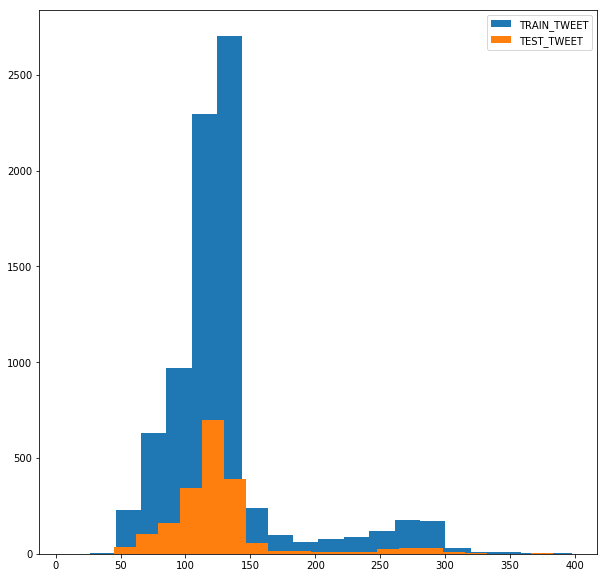

In [17]:
length_train = df_train['tweet'].str.len()
length_test  = df_test['tweet'].str.len()

plt.figure(figsize=(10,10))
plt.hist(length_train,bins=20,label = "TRAIN_TWEET")
plt.hist(length_test,bins =20, label = "TEST_TWEET")
plt.legend()

**the length of the test tweet in the dataframe is very much less as compared to the train tweet.**

### DATA CLEANING

In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

Before we begin cleaning, let’s first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

In [20]:
combi = df_train.append(df_test,ignore_index=True,sort=False)

In [21]:
combi.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...


In [22]:
combi.tail()

,id,label,tweet
9868,9869,NaN,"#SamsungGalaxyNote7 Explodes, Burns 6-Year-Old..."
9869,9870,NaN,Now Available - Hoodie. Check it out here - ht...
9870,9871,NaN,There goes a crack right across the screen. If...
9871,9872,NaN,@codeofinterest as i said #Adobe big time we m...
9872,9873,NaN,Finally I got it .. thanx my father .. #Samsun...


In [23]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    
    for i in r:
        input_txt=re.sub(i,'',input_txt)
        
    return input_txt

In [24]:
combi['clean_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [25]:
combi.head()

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


In [26]:
#Removing punctuation and special character.
combi['clean_tweet'] = combi['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(5)

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https goo gl h ...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this Would you go #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


In [27]:
#removing short words
combi['clean_tweet']=combi['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [28]:
combi.head()

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https MfQV #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


In [29]:
#tokenisation

tokenised_tweet = combi['clean_tweet'].apply(lambda x:x.split())

tokenised_tweet.head()

0    [#fingerprint, #Pregnancy, Test, https, MfQV, ...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, #talk, #makememories, #unp...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service, Apple, even, talk, ab...
Name: clean_tweet, dtype: object

In [31]:
#stemming with porter stemmer

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

toketweetStem = tokenised_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [32]:
toketweetStem.head()

0    [#fingerprint, #pregnanc, test, http, mfqv, #a...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, #talk, #makememori, #unplug...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: clean_tweet, dtype: object

In [34]:
#also checking snowball stemmer
from nltk.stem.snowball import SnowballStemmer

stemmer_snow = SnowballStemmer("english")

toketweetSnow = tokenised_tweet.apply(lambda x:[stemmer_snow.stem(i) for i in x])

In [35]:
toketweetSnow.head()

0    [#fingerprint, #pregnanc, test, https, mfqv, #...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, this, would, #talk, #makememori, #unplu...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: clean_tweet, dtype: object

In [36]:
toketweetSnow[0]

['#fingerprint',
 '#pregnanc',
 'test',
 'https',
 'mfqv',
 '#android',
 '#app',
 '#beauti',
 '#cute',
 '#health',
 '#iger',
 '#iphoneon',
 '#iphonesia',
 '#iphon']

In [37]:
toketweetStem[0]

['#fingerprint',
 '#pregnanc',
 'test',
 'http',
 'mfqv',
 '#android',
 '#app',
 '#beauti',
 '#cute',
 '#health',
 '#iger',
 '#iphoneonli',
 '#iphonesia',
 '#iphon']

In [38]:
#lets use our snowball stemmer tokenised tweet

for i in range(len(toketweetSnow)):
    toketweetSnow[i]=' '.join(toketweetSnow[i])
    
combi['clean_tweet'] = toketweetSnow

combi.head()

,id,label,tweet,clean_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnanc test https mfqv #androi...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl #yay #s...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this would #talk #makememori #unplug #rel...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wire know georg made that #iphon #cute #davent...
4,5,1.0,What amazing service! Apple won't even talk to...,what amaz servic appl even talk about question...


### BAG-of-WORDS FEATURES

to analyse a preprocessed data, it need to converted into features.
#using bag-of-words feature

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [40]:
bow_vectorizer= CountVectorizer(max_df=0.90,min_df=2,max_features=1000, stop_words='english')

In [41]:
bow = bow_vectorizer.fit_transform(combi['clean_tweet'])
bow.shape

(9873, 1000)

# TfIDF Features

This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

TF-IDF = TF*IDF

In [42]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combi['clean_tweet'])
tfidf.shape

(9873, 1000)

### word2vec

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen, which is mind-blowing.

The advantages of using word embeddings over BOW or TF-IDF are:

Dimensionality reduction - significant reduction in the no. of features required to build a model.

It capture meanings of the words, semantic relationships and the different types of contexts they are used in.


Word2Vec Embeddings
Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

Below is a diagrammatic representation of a 1-word context window Word2Vec model.


There are three laters: - an input layer, - a hidden layer, and - an output layer.

The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. The weights learned by the model are then used as the word-vectors.

We will go ahead with the Skip-gram model as it has the following advantages:

It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.

Skip-gram with negative sub-sampling outperforms CBOW generally.

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus. There is one more option of using pre-trained word vectors instead of training our own model. Some of the freely available pre-trained vectors are:

Google News Word Vectors

Freebase names

DBPedia vectors (wiki2vec)

However, for this course, we will train our own word vectors since size of the pre-trained word vectors is generally huge.

Let’s train a Word2Vec model on our corpus.

In [43]:
import gensim

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [44]:
tokenised_again = combi['clean_tweet'].apply(lambda x:x.split())

model_w2v = gensim.models.Word2Vec(tokenised_again,size=200,window=5,
                                  min_count=2,
                                  sg=1,hs=0,negative=10,
                                  workers=2,
                                  seed=42)

In [45]:
model_w2v.train(tokenised_again,total_examples=len(combi['clean_tweet']), epochs=20)

(1846007, 2567180)

In [46]:
model_w2v.most_similar(positive="food")

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('hamburg', 0.8193708658218384),
 ('diamond', 0.8035350441932678),
 ('macaron', 0.7979682683944702),
 ('pattern', 0.7906177639961243),
 ('totem', 0.7816594839096069),
 ('#affirm', 0.7707458734512329),
 ('rainbow', 0.7643883228302002),
 ('laser', 0.7501481771469116),
 ('henna', 0.7438300848007202),
 ('bestcheapphon', 0.7386386394500732)]

In [47]:
model_w2v['pattern']

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.22995289,  0.64209867,  0.03517272, -0.02807054,  0.1914678 ,
       -0.06931217,  0.31573468, -0.2591764 , -0.17968985, -0.2940012 ,
       -0.20642361,  0.22839044,  0.25718653,  0.14738743, -0.13481519,
       -0.19939092,  0.1311853 , -0.02296082,  0.51283723, -0.15798211,
       -0.28987536,  0.54819167, -0.12780473,  0.13452856,  0.3769379 ,
        0.12477472, -0.39689896, -0.22677657,  0.13568471, -0.35764775,
        0.4049188 , -0.29155838, -0.30774307,  0.10043439,  0.03572094,
       -0.27481252, -0.44231424,  0.13431324,  0.15215957,  0.05254231,
        0.21445419,  0.08985748,  0.24212146,  0.45672905,  0.06886608,
       -0.41277978, -0.25951147, -0.404326  , -0.29283294,  0.11542978,
        0.00930906,  0.46962953, -0.03430159, -0.5474187 , -0.0647354 ,
        0.09652998,  0.00740897, -0.06852113,  0.15307476,  0.02402356,
        0.08478185, -0.01854081, -0.41364437,  0.17194062,  0.22005707,
       -0.04035107,  0.5470895 ,  0.04794438,  0.01753961, -0.25

#### word2vec features 

In [48]:
def word_vector(tokens,size):
    vec= np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count +=1
        except KeyError:
            continue
    if count !=0:
        vec /=count
    return vec


In [49]:
wordvec_arrays =np.zeros((len(tokenised_again),200))
for i in range(len(tokenised_again)):
    wordvec_arrays[i,:]=word_vector(tokenised_again[i],200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
    wordvec_df.shape

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [50]:
wordvec_df.shape

(9873, 200)

**the bof and tf-idf features contains our data set have the feature of the 1000  and where as word2svec data set hav the features of the 200 only.**

### Doc2Vec Embedding

In [53]:
from tqdm import tqdm

In [54]:
tqdm.pandas(desc="progress-bar")

In [55]:
from gensim.models.doc2vec import LabeledSentence

In [56]:
def add_label(twt):
    output =[]
    for i, s in zip(twt.index,twt):
        output.append(LabeledSentence(s,["tweet_"+str(i)]))
    return output

In [57]:
labeled_tweets = add_label(tokenised_again)

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


In [58]:
labeled_tweets[:6]

[LabeledSentence(words=['#fingerprint', '#pregnanc', 'test', 'https', 'mfqv', '#android', '#app', '#beauti', '#cute', '#health', '#iger', '#iphoneon', '#iphonesia', '#iphon'], tags=['tweet_0']),
 LabeledSentence(words=['final', 'transpar', 'silicon', 'case', 'thank', 'uncl', '#yay', '#soni', '#xperia', '#sonyexperia', 'http', 'instagram', 'yget'], tags=['tweet_1']),
 LabeledSentence(words=['love', 'this', 'would', '#talk', '#makememori', '#unplug', '#relax', '#iphon', '#smartphon', '#wifi', '#connect', 'http', 'lsupcu'], tags=['tweet_2']),
 LabeledSentence(words=['wire', 'know', 'georg', 'made', 'that', '#iphon', '#cute', '#daventri', '#home', 'http', 'instagr'], tags=['tweet_3']),
 LabeledSentence(words=['what', 'amaz', 'servic', 'appl', 'even', 'talk', 'about', 'question', 'have', 'unless', 'them', 'their', 'stupid', 'support'], tags=['tweet_4']),
 LabeledSentence(words=['iphon', 'softwar', 'updat', 'fuck', 'phone', 'time', 'stupid', 'iphon'], tags=['tweet_5'])]

In [61]:
#lets train doc2vec model

model_2vec = gensim.models.Doc2Vec(dm=1,
                                  dm_mean=1,
                                  size=200,
                                  window=5,
                                  negative=7,
                                  min_count=5,
                                  workers=3,
                                  alpha=0.1,
                                  seed =42)

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [62]:
model_2vec.build_vocab([i for i in tqdm(labeled_tweets)])


100%|█████████████████████████████████████████████████████████████████████████| 9873/9873 [00:00<00:00, 1584357.94it/s]


In [63]:
model_2vec.train(labeled_tweets,total_examples=len(combi['clean_tweet']),epochs=15)

In [64]:
#preparing doc2vec Features set

docvec_arrays = np.zeros((len(tokenised_again),200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_2vec.docvecs[i].reshape((1,200))
    

In [65]:
docvec_df= pd.DataFrame(docvec_arrays)

In [66]:
docvec_df.shape

(9873, 200)

# Modelling our train and test set

In [68]:
#logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#### using logistic regression on the bag of words

In [72]:
#extracting train and test set from the bow features varname bow
train_bow = bow[:7920,:]

In [73]:
type(train_bow)

scipy.sparse.csr.csr_matrix

In [74]:
test_bow = bow[7920:,:]

In [76]:
#spiliting the data into training and validation set
Xtrain_bow,X_val_bow,y_train_bow,y_val_bow = train_test_split(train_bow,df_train['label'],random_state=42,test_size=0.3)

In [77]:
lreg = LogisticRegression()
lreg.fit(Xtrain_bow,y_train_bow)

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
prediction = lreg.predict_proba(X_val_bow)# prediction on the validation set

In [79]:
prediction_int = prediction[:,1] >=0.3 #if prediction is greater than or equal to 0.3 than 1 else 0 

In [80]:
prediction_int =  prediction_int.astype(np.int)

In [81]:
f1_score(y_val_bow,prediction_int)

0.8033589923023093

### we get the accuracy of the 80% 

now submission file creating

In [84]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)
df_test['label'] = test_pred_int
submission = df_test[['id','label']]
submission.to_csv('sub_logis_reg.csv',index=False)

## TF-IDF Features

In [85]:
train_tfidf = tfidf[:7920,:]
test_tfidf=tfidf[7920:,:]

In [86]:
X_train_tfidf = train_tfidf[y_train_bow.index]
X_Val_tfidf = train_tfidf[y_val_bow.index]

In [87]:
lreg.fit(X_train_tfidf,y_train_bow)

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
predict_log = lreg.predict_proba(X_Val_tfidf)

In [89]:
predict_int_log = predict_log[:,1]>=0.3
predict_int_log = predict_int_log.astype(np.int)

In [90]:
f1_score(y_val_bow,predict_int_log)

0.8139372822299651

In [ ]:
#submission here

### now it is better than above bow features.

In [92]:
train_w2v = wordvec_df.iloc[:7920,:]
test_w2v = wordvec_df.iloc[7920:,:]

X_train_w2v = train_w2v.iloc[y_train_bow.index,:]

In [95]:
X_valid_w2v = train_w2v.iloc[y_val_bow.index,:]

In [97]:
lreg.fit(X_train_w2v,y_train_bow)

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
prediction_w2v = lreg.predict_proba(X_valid_w2v)

In [99]:
prediction_w2v_int = prediction_w2v[:,1] >=0.3

In [100]:
prediction_w2v_int = prediction_w2v_int.astype(np.int) 

In [101]:
f1_score(y_val_bow,prediction_w2v_int)

0.821008984105045

### accuracy is greater than previous one

### Doc2vec Features

In [102]:
train_d2v = docvec_df.iloc[:7920,:]
test_d2v = docvec_df.iloc[7920:,:]

In [103]:
X_train_d2v = train_d2v.iloc[y_train_bow.index,:]
X_valid_d2v = train_d2v.iloc[y_val_bow.index,:]

In [104]:
lreg.fit(X_train_d2v,y_train_bow)

C:\Users\chauhans\Anaconda3\envs\nlp_course\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [106]:
prediction_d2v = lreg.predict_proba(X_valid_d2v)

In [107]:
prediction_d2v_int = prediction_d2v[:,1]>=0.3

prediction_d2v_int = prediction_d2v_int.astype(np.int)

In [108]:
f1_score(y_val_bow,prediction_d2v_int)

0.6319396847155586

#### Very bad Performance in this doc2vector features.


# Highest feature extraction is word2vectors scoring 81% in the f1_score

In [ ]:
#trying xboost